## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras


Using TensorFlow backend.


<Response [200]>

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Code Here
    建立你的神經網路
    """
    # input
    input_layer = keras.layers.Input(input_shape)
    
    # hidden
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    # output
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0, 0.25, 0.5, 0.8]
redice_lr_patient = [5, 20]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
   
    reduce_lr = ReduceLROnPlateau(factor = reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience = reduce_patient, 
                                  verbose=1)
     
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.00, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
b

Epoch 9/25
50000/50000 [==============================] - 1s 27us/step - loss: 2.9140 - accuracy: 0.1141 - val_loss: 2.7211 - val_accuracy: 0.1125
Epoch 10/25
50000/50000 [==============================] - 1s 27us/step - loss: 2.9139 - accuracy: 0.1128 - val_loss: 2.7659 - val_accuracy: 0.1126
Epoch 11/25
50000/50000 [==============================] - 1s 28us/step - loss: 2.9144 - accuracy: 0.1142 - val_loss: 2.8042 - val_accuracy: 0.1123
Epoch 12/25
50000/50000 [==============================] - 1s 27us/step - loss: 2.9144 - accuracy: 0.1139 - val_loss: 2.8365 - val_accuracy: 0.1121
Epoch 13/25
50000/50000 [==============================] - 1s 28us/step - loss: 2.9138 - accuracy: 0.1133 - val_loss: 2.8622 - val_accuracy: 0.1109
Epoch 14/25
50000/50000 [==============================] - 1s 27us/step - loss: 2.9142 - accuracy: 0.1143 - val_loss: 2.8818 - val_accuracy: 0.1116
Epoch 15/25
50000/50000 [==============================] - 1s 28us/step - loss: 2.9151 - accuracy: 0.1141 - val_l

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 35us/step - loss: 3.0391 - accuracy: 0.0944 - val_loss: 2.3650 - val_accuracy: 0.0924
Epoch 2/25
50000/50000 [==============================] - 1s 27us/step - loss: 3.0376 - accuracy: 0.0949 - val_loss: 2.4067 - val_accuracy: 0.1030
Epoch 3/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0400 - accuracy: 0.0944 - val_loss: 2.4702 - val_accuracy: 0.1044
Epoch 4/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0393 - accuracy: 0.0943 - val_loss: 2.5383 - val_accuracy: 0.1038
Epoch 5/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0388 - accuracy: 0.0955 - val_loss: 2.6046 - val_accuracy: 0.1048
Epoch 6/25
50000/50000 [==============================] - 1s 27us/step - loss: 3.0393 - accuracy: 0.0947 - val_loss: 2.6679 - val_accuracy: 0.1044
Epoch 7/25
50000/50000 [==============================] - 1s 28us/st

Epoch 21/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0081 - accuracy: 0.0993 - val_loss: 3.0211 - val_accuracy: 0.0960
Epoch 22/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0085 - accuracy: 0.0990 - val_loss: 3.0219 - val_accuracy: 0.0959
Epoch 23/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0081 - accuracy: 0.0996 - val_loss: 3.0223 - val_accuracy: 0.0961
Epoch 24/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0087 - accuracy: 0.0996 - val_loss: 3.0221 - val_accuracy: 0.0960
Epoch 25/25
50000/50000 [==============================] - 1s 27us/step - loss: 3.0079 - accuracy: 0.1001 - val_loss: 3.0222 - val_accuracy: 0.0959
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 20
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)           

Epoch 6/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0392 - accuracy: 0.1075 - val_loss: 2.6753 - val_accuracy: 0.1016
Epoch 7/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0397 - accuracy: 0.1079 - val_loss: 2.7380 - val_accuracy: 0.1015
Epoch 8/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0405 - accuracy: 0.1066 - val_loss: 2.7954 - val_accuracy: 0.1030
Epoch 9/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0398 - accuracy: 0.1076 - val_loss: 2.8465 - val_accuracy: 0.1027
Epoch 10/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0391 - accuracy: 0.1076 - val_loss: 2.8908 - val_accuracy: 0.1045
Epoch 11/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0399 - accuracy: 0.1076 - val_loss: 2.9284 - val_accuracy: 0.1054
Epoch 12/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0392 - accuracy: 0.1075 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.7627 - accuracy: 0.3863 - val_loss: 2.2724 - val_accuracy: 0.2521
Epoch 2/25
50000/50000 [==============================] - 1s 29us/step - loss: 1.4942 - accuracy: 0.4742 - val_loss: 1.8191 - val_accuracy: 0.3425
Epoch 3/25
50000/50000 [==============================] - 1s 29us/step - loss: 1.3933 - accuracy: 0.5085 - val_loss: 1.7667 - val_accuracy: 0.3843
Epoch 4/25
50000/50000 [==============================] - 1s 29us/step - loss: 1.3077 - accuracy: 0.5397 - val_loss: 1.7582 - val_accuracy: 0.3759
Epoch 5/25
50000/50000 [==============================] - 1s 29us/step - loss: 1.2479 - accuracy: 0.5593 - val_loss: 1.7051 - val_accuracy: 0.3952
Epoch 6/25
50000/50000 [==============================] - 1s 29us/step - loss: 1.1910 - accuracy: 0.5812 - val_loss: 2.1248 - val_accuracy: 0.3366
Epoch 7/25
50000/50000 [==============================] - 1s 29us/st

50000/50000 [==============================] - 1s 29us/step - loss: 3.0167 - accuracy: 0.0924 - val_loss: 3.0115 - val_accuracy: 0.0943
Epoch 21/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0179 - accuracy: 0.0919 - val_loss: 3.0128 - val_accuracy: 0.0941
Epoch 22/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0173 - accuracy: 0.0924 - val_loss: 3.0136 - val_accuracy: 0.0942
Epoch 23/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0183 - accuracy: 0.0909 - val_loss: 3.0140 - val_accuracy: 0.0942
Epoch 24/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0176 - accuracy: 0.0928 - val_loss: 3.0142 - val_accuracy: 0.0942
Epoch 25/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0191 - accuracy: 0.0916 - val_loss: 3.0145 - val_accuracy: 0.0942
Numbers of exp: 10, reduce_factor: 0.25, reduce_patient: 5
Model: "model_11"
_______________________________________________

Epoch 5/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0395 - accuracy: 0.0866 - val_loss: 2.5611 - val_accuracy: 0.0864
Epoch 6/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0420 - accuracy: 0.0863 - val_loss: 2.6327 - val_accuracy: 0.0892
Epoch 7/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0411 - accuracy: 0.0864 - val_loss: 2.7010 - val_accuracy: 0.0876
Epoch 8/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0416 - accuracy: 0.0863 - val_loss: 2.7633 - val_accuracy: 0.0861
Epoch 9/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0411 - accuracy: 0.0869 - val_loss: 2.8183 - val_accuracy: 0.0867
Epoch 10/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0418 - accuracy: 0.0870 - val_loss: 2.8648 - val_accuracy: 0.0878
Epoch 11/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0413 - accuracy: 0.0862 - val_loss:

50000/50000 [==============================] - 1s 29us/step - loss: 3.0539 - accuracy: 0.0962 - val_loss: 3.0376 - val_accuracy: 0.0937
Numbers of exp: 13, reduce_factor: 0.50, reduce_patient: 20
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)               1024      
____________________________________________________________

Epoch 10/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0729 - accuracy: 0.1019 - val_loss: 2.9507 - val_accuracy: 0.0970
Epoch 11/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0733 - accuracy: 0.1020 - val_loss: 2.9866 - val_accuracy: 0.0975
Epoch 12/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0735 - accuracy: 0.1012 - val_loss: 3.0171 - val_accuracy: 0.0970
Epoch 13/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0744 - accuracy: 0.1018 - val_loss: 3.0412 - val_accuracy: 0.0964
Epoch 14/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0737 - accuracy: 0.1020 - val_loss: 3.0598 - val_accuracy: 0.0974
Epoch 15/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0734 - accuracy: 0.1009 - val_loss: 3.0735 - val_accuracy: 0.0983
Epoch 16/25
50000/50000 [==============================] - 1s 30us/step - loss: 3.0729 - accuracy: 0.1016 - val_

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8063 - accuracy: 0.3745 - val_loss: 2.3592 - val_accuracy: 0.2385
Epoch 2/25
50000/50000 [==============================] - 1s 28us/step - loss: 1.5429 - accuracy: 0.4572 - val_loss: 1.9404 - val_accuracy: 0.3258
Epoch 3/25
50000/50000 [==============================] - 1s 28us/step - loss: 1.4311 - accuracy: 0.4934 - val_loss: 2.3148 - val_accuracy: 0.2711
Epoch 4/25
50000/50000 [==============================] - 1s 28us/step - loss: 1.3546 - accuracy: 0.5204 - val_loss: 1.7045 - val_accuracy: 0.3945
Epoch 5/25
50000/50000 [==============================] - 1s 28us/step - loss: 1.2979 - accuracy: 0.5412 - val_loss: 2.0679 - val_accuracy: 0.3371
Epoch 6/25
50000/50000 [==============================] - 1s 28us/step - loss: 1.2450 - accuracy: 0.5620 - val_loss: 2.0802 - val_accuracy: 0.3393
Epoch 7/25
50000/50000 [==============================] - 1s 28us/st

50000/50000 [==============================] - 1s 30us/step - loss: 2.8788 - accuracy: 0.1197 - val_loss: 2.8676 - val_accuracy: 0.1198
Epoch 21/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.8779 - accuracy: 0.1195 - val_loss: 2.8684 - val_accuracy: 0.1199
Epoch 22/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.8775 - accuracy: 0.1202 - val_loss: 2.8691 - val_accuracy: 0.1198
Epoch 23/25
50000/50000 [==============================] - 1s 28us/step - loss: 2.8788 - accuracy: 0.1199 - val_loss: 2.8695 - val_accuracy: 0.1198
Epoch 24/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.8772 - accuracy: 0.1212 - val_loss: 2.8697 - val_accuracy: 0.1199
Epoch 25/25
50000/50000 [==============================] - 1s 28us/step - loss: 2.8783 - accuracy: 0.1198 - val_loss: 2.8698 - val_accuracy: 0.1200
Numbers of exp: 18, reduce_factor: 0.25, reduce_patient: 5
Model: "model_19"
_______________________________________________

Epoch 5/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9865 - accuracy: 0.1016 - val_loss: 2.5467 - val_accuracy: 0.1044
Epoch 6/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9867 - accuracy: 0.1024 - val_loss: 2.6129 - val_accuracy: 0.1015
Epoch 7/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9872 - accuracy: 0.1020 - val_loss: 2.6780 - val_accuracy: 0.0996
Epoch 8/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9862 - accuracy: 0.1017 - val_loss: 2.7385 - val_accuracy: 0.0986
Epoch 9/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9864 - accuracy: 0.1011 - val_loss: 2.7921 - val_accuracy: 0.0993
Epoch 10/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9875 - accuracy: 0.1015 - val_loss: 2.8377 - val_accuracy: 0.1006
Epoch 11/25
50000/50000 [==============================] - 1s 29us/step - loss: 2.9874 - accuracy: 0.1011 - val_loss:

50000/50000 [==============================] - 1s 29us/step - loss: 3.0418 - accuracy: 0.0969 - val_loss: 3.0542 - val_accuracy: 0.0977
Numbers of exp: 21, reduce_factor: 0.50, reduce_patient: 20
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_64 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_65 (Batc (None, 256)               1024      
____________________________________________________________

Epoch 10/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0523 - accuracy: 0.0930 - val_loss: 2.8584 - val_accuracy: 0.0877
Epoch 11/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0519 - accuracy: 0.0928 - val_loss: 2.9016 - val_accuracy: 0.0875
Epoch 12/25
50000/50000 [==============================] - 1s 28us/step - loss: 3.0538 - accuracy: 0.0928 - val_loss: 2.9378 - val_accuracy: 0.0879
Epoch 13/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0524 - accuracy: 0.0935 - val_loss: 2.9666 - val_accuracy: 0.0890
Epoch 14/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0525 - accuracy: 0.0924 - val_loss: 2.9885 - val_accuracy: 0.0894
Epoch 15/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0519 - accuracy: 0.0936 - val_loss: 3.0044 - val_accuracy: 0.0893
Epoch 16/25
50000/50000 [==============================] - 1s 29us/step - loss: 3.0534 - accuracy: 0.0924 - val_

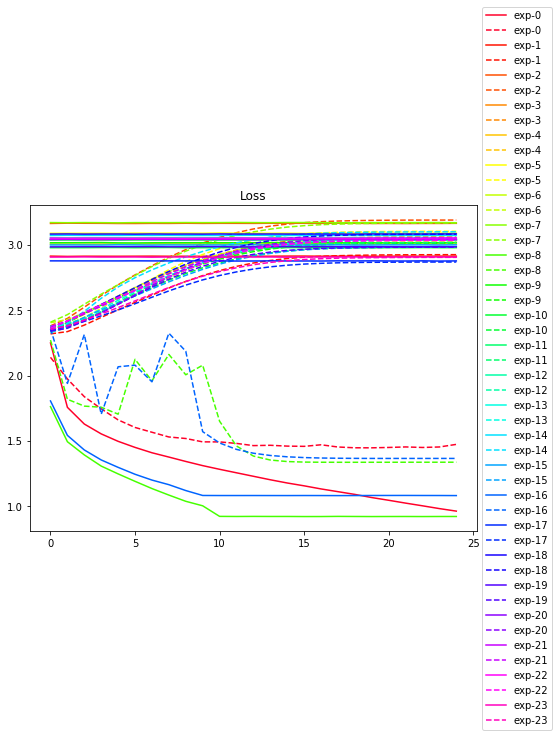

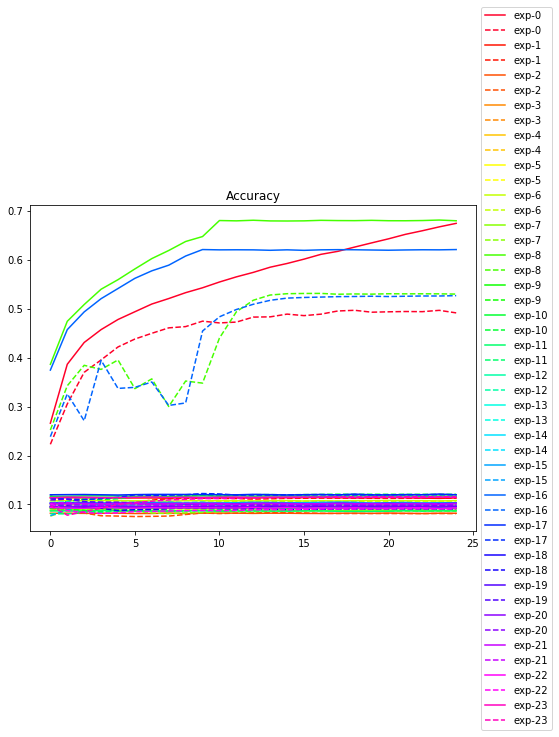

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()